
-------------------------------------
# **Project 1: Movie Data Analysis**
-------------------------------------

--------------------
## **Context**
--------------------

In an era marked by the convergence of technology and entertainment, the film industry is a pillar of global cultural dissemination and economic vitality.  Understanding the intricate factors influencing a movie's commercial success is paramount within this dynamic landscape.  Leveraging data from the Internet Movie Database (IMDb), this project aims to delve into the multifaceted realm of box office hits, dissecting the variables that potentially shape their triumph or demise.

The cinematic ecosystem is a tapestry woven with diverse elements, ranging from star power and production budget to genre and critical reception.  Against this backdrop, the analysis endeavors to discern patterns and correlations within the data, unraveling the enigmatic interplay between various attributes and a movie's financial performance.

As the digital era reshapes audience preferences and consumption patterns, traditional metrics of success undergo a metamorphosis.  Thus, this investigation seeks to illuminate established paradigms and explore emerging trends and disruptions catalyzed by technological advancements and shifting audience dynamics.

By scrutinizing the data with a meticulous eye and employing sophisticated analytical methodologies, this project endeavors to offer insights that transcend conventional wisdom, providing stakeholders within the film industry with actionable intelligence to navigate an ever-evolving landscape and maximize their chances of crafting cinematic endeavors that resonate with audiences and thrive at the box office.

------------------
## **Objective**
------------------

This data analysis and visualization project aims to investigate and identify critical attributes influencing the commercial success of movies.  Leveraging data sourced from IMDb, the project aims to uncover patterns and correlations between various factors and a movie's box office performance.  Through meticulous analysis and visualization techniques, the project seeks to provide actionable insights to stakeholders in the film industry, enabling them to make informed decisions to enhance the financial viability of their cinematic endeavors.

-----------------------------
## **General Key Questions**
-----------------------------

- What is the dataset source for the visualization project, and how reliable and comprehensive is it?

- How can data be cleaned and prepared for visualization to ensure accuracy and consistency?

- What visualization techniques are most suitable for representing different data types and revealing insights?

- How should the visualizations be designed to cater to the target audience and convey information efficiently?

- Can any specific trends or patterns in the data be uncovered through visualization?

- What are the key metrics and performance indicators to track the effectiveness of the visualization?

- Can the visualization techniques be applied to different datasets and domains beyond the current project?

- How can user feedback and iterative design processes be integrated to improve the effectiveness of the visualizations continuously?

-----------------------------
## **Data Specific Key Questions**
-----------------------------
*   What are the most popular movies?
  *   Determine the top-rated or most popular titles based on IMDb ratings or user reviews.
      
* What are the trends in movie genres over time?
    * Analyze how the popularity of different genres has evolved over the years.
      
* Which actors have appeared in the most movies?
    * Identify prolific actors and actresses in the IMDb database.
      
* What are the highest-grossing movies of all time?
    * Investigate box office revenue data to find the most financially successful films.
      
* Are there any correlations between movie budgets and box office performance?
    * Explore whether higher budgets lead to higher box office earnings.
      
* What is the distribution of movie ratings on IMDb?
    * Analyze the distribution of IMDb ratings to understand audience preferences.
            
* What is the average movie runtime?
    * Calculate the average duration of movies and see if there are any trends over time.
      
* Who are the top-rated directors?
    * Identify directors with the highest-rated movies in the database.     
      
* Are there any geographical trends in movie preferences?
    * Explore whether movie preferences vary by region or country.
      
* How has the film industry evolved over the years?
    * Look at historical data to understand film production, technology, and distribution changes.
      
* What are the most influential factors for IMDb ratings?
    * Analyze which factors, genre, director, or cast impact ratings are most important.

* Are there any outliers or anomalies in the data?
    * Look for unusual or unexpected patterns in the data that may require further investigation.

------------------------------------
## **Dataset Description**
------------------------------------

### Dataset Source
The team sourced our data from Kaggle by exploring various datasets available on the website and reviewing how extensive the dataset was to enable us to answer some key questions.  The team landed on a data set in the form of a CSV file that contained over 10k rows of data and 12 columns.

The dataset source is kaggle.com; the dataset creator cited their source as www.imdb.com.  The creator also used a machine learning algorithm to fill in the missing values, so there may be some possible errors.  This data represents a subset of the complete IMDb.  The creator did not note the criteria for web scraping.  The team assumes the data set is complete and accurate for this project.

### Data Dictionary

* names: movie name
* date_x: release date
* score: user rating
* genre: genre of the movie
* overview: a summary of the movie's plot
* crew: crew members
* orig_title: the original title of the movie
* status: release status
* orig_lang: originally released in this language
* budget_x: movie budget
* revenue: revenue generated worldwide
* country: release country

### Data Exploration
The data was explored by importing a CSV file into a Juypter notebook.  The team performed the following tasks:
- Datatype conversions:
  - Within column "date_x," converted datatype from object to DateTime
  - Within columns "budget_x" and "revenue," converted floats to integers.
- Removed null values within the columns "genre" and "crew".  This action led to the removal of  126 rows of data, leaving us with 10052 rows, down from 10178.
- Reset the index.
- Renamed columns for readability.

As a team, the team talked about columns containing data arrays such as "Genre" and "Actors" and how to handle analysis for those.  The team looked at data sources to understand if the array is rank-ordered.  There is no documentation, so the team will assume the case.  For analysis, the team will pull the 1st genre and the top 25 actors/crew members.

##  **Importing the necessary libraries and overview of the dataset**

In [331]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

import scipy.stats as st
from collections import Counter, defaultdict

### **Loading the dataset**

In [332]:
# Read the CSV file located at '/content/imdb_movies.csv' into a DataFrame named 'data'.
data = pd.read_csv('/content/imdb_movies (1).csv')

In [333]:
# Create a copy of the DataFrame 'data' and store it in a new DataFrame named 'df'. This ensures that any modifications made to 'df' will not affect the original 'data' DataFrame.
df = data.copy()

## **Initial Data Exploration**


### **View the first 5 rows of the dataset**

In [334]:
# Print the first few rows of the DataFrame 'df'. This is useful for getting a quick overview of the data and its structure.
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


**Observations:**

* ...

### **View the last 5 rows of the dataset**

In [335]:
# Print the last few rows of the DataFrame 'df'. This is useful for checking the end of the data and identifying any potential anomalies.
df.tail()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9353729.0,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6698361.0,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,22997992.0,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,475661306.0,US
10177,The Swan Princess: A Royal Wedding,07/20/2020,70.0,"Animation, Family, Fantasy",Princess Odette and Prince Derek are going to ...,"Nina Herzog, Princess Odette (voice), Yuri Low...",The Swan Princess: A Royal Wedding,Released,English,92400000.0,539401838.6,GB


**Observations:**

* ...

### **Checking the shape of the dataset**

In [336]:
# Print the shape of the DataFrame, which gives the number of rows and columns.
print(df.shape)

(10178, 12)


### **Checking the info()**

In [337]:
# Print a concise summary of the DataFrame, including the data type of each column, the number of non-null values, and the memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


**Observations:**

* ...

### **Summary of the data**

In [338]:
# Print the transpose of the DataFrame's descriptive statistics, which includes the mean, standard deviation, minimum, maximum, and quartiles for each numeric column.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10178.0,6.349705e+01,1.353701e+01,0.0,59.0,65.0,71.0,1.000000e+02
budget_x,10178.0,6.488238e+07,5.707565e+07,1.0,15000000.0,50000000.0,105000000.0,4.600000e+08
revenue,10178.0,2.531401e+08,2.777880e+08,0.0,28588985.0,152934876.5,417802077.1,2.923706e+09


**By default, the describe() function shows the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

In [339]:
# Print the transpose of the DataFrame's descriptive statistics, excluding numeric columns, which includes the count, unique values, top value, and frequency for each non-numeric column.
df.describe(exclude = 'number').T

,count,unique,top,freq
names,10178,9660,Pinocchio,12
date_x,10178,5688,04/07/2023,41
genre,10093,2303,Drama,556
overview,10178,9905,We don't have an overview translated in Englis...,89
crew,10122,9927,"Scout Taylor-Compton, Laurie Strode, Tyler Man...",3
orig_title,10178,9736,Pinocchio,12
status,10178,3,Released,10131
orig_lang,10178,54,English,7417
country,10178,60,AU,4885


**Observations:**

* ...

## **Data Cleaning**

In [340]:
# Convert the 'date_x' column to a datetime format using the 'pd.to_datetime' function.
df['budget_x'] = df['budget_x'].astype(int)

# Convert the 'budget_x' and 'revenue' columns to integer type using the 'astype(int)' method.
df['revenue'] = df['revenue'].astype(int)

# Print the DataFrame's information, including data type of each column and memory usage.df['date_x'] = pd.to_datetime(df['date_x'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  int64  
 10  revenue     10178 non-null  int64  
 11  country     10178 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 954.3+ KB


In [341]:
# Print the DataFrame, which is a tabular data structure with rows and columns.
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [342]:
# Modified code from ChatGPT

# Identify duplicates (marking all duplicates as True, the first occurrence as False by default)
duplicates = df.duplicated(keep='first')

# Count duplicates
num_duplicates = duplicates.sum()

# Display the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")

# Review duplicate rows to understand what's being duplicated
print("Duplicate rows:")
df[duplicates]

#

Number of duplicate rows: 0
Duplicate rows:


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country


In [343]:
# Print the column names of the DataFrame 'df'. This is useful for getting an overview of the data and its structure.
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [344]:
# Print a concise summary of the DataFrame, including the data type of each column, the number of non-null values, and the memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  int64  
 10  revenue     10178 non-null  int64  
 11  country     10178 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 954.3+ KB


In [345]:
# Identify columns with null data and how many items.
df.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [346]:
# Display sample rows with null values for genre
df[df['genre'].isnull()].head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
305,Housewife Sex Slaves: Hatano Yui,01/09/2015,0.0,NaN,We don't have an overview translated in Englis...,"Yui Hatano,",人妻性奴隷 波多野結衣,Released,Japanese,167540000,175269998,JP
1174,Beauty Rope Cosmetology,12/02/1983,10.0,NaN,Miki is the daughter of an affluent family. Sh...,"Miki Takakura, Miki, Maya Ito, Rena, Ren Osugi...",団鬼六 美女縄化粧,Released,Japanese,201940000,38157314,JP
1561,Reclaim,07/29/2022,20.0,NaN,She is a good woman living a fulfilling life. ...,NaN,Reclaim,Released,Chinese,12001040,38139010,US
1762,Ancient Chinese Whorehouse,09/15/1994,50.0,NaN,Madam Five and carpenter Kong work together ma...,"Kent Cheng, Kong, Yvonne Yung Hung, Miss Ng, S...",青樓十二房,Released,Cantonese,163600000,812667214,HK
1776,Porno document: Toruko tokkyû bin,02/26/1982,100.0,NaN,Pinku from 1982.,"Jun Miho, , Rumi Kagawa, , Miyuki Oka, , Kayok...",ポルノドキュメント トルコ特急便,Released,Japanese,201000000,1569323843,JP
2020,"Moses, Prince of Egypt",01/01/2000,56.0,NaN,"At birth, Moses, a Hebrew baby is abandoned on...",NaN,"Moses, Prince of Egypt",Released,English,80300000,321306715,AU
2144,My Beautiful Man ～eternal～,04/07/2023,0.0,NaN,We don't have an overview translated in Englis...,"Riku Hagiwara, , Yusei Yagi,",美しい彼～eternal～,Released,Japanese,167540000,175269998,JP
2267,Office Lady Rope Slave,01/23/1981,20.0,NaN,Two assistants to an S&M photographer decide t...,"Junko Mabuki, Kimiyo Ezaki, Asami Ogawa, Kikuk...",団鬼六 ＯＬ縄奴隷,Released,Japanese,12001040,38139010,JP
2317,Dream to be a Wife,09/09/2015,0.0,NaN,We don't have an overview translated in Englis...,"Ai Uehara,",欲望人妻：滴垂之蜜,Released,Chinese,167540000,175269998,CN
2431,Barbie,01/01/1977,20.0,NaN,Barbie comes home from shopping. She takes her...,NaN,Barbie,Released,No Language,12001040,38139010,US


In [347]:
# Display sample rows with null values for crew
df[df['crew'].isnull()].head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
148,Orgasm Inc: The Story of OneTaste,11/05/2022,64.0,Documentary,A sexual wellness company gains fame and follo...,NaN,Orgasm Inc: The Story of OneTaste,Released,English,77400000,431611098,US
206,Legend of the Galactic Heroes: Die Neue These ...,09/30/2022,61.0,Animation,The story focuses on the exploits of rivals Re...,NaN,銀河英雄伝説 Die Neue These 策謀 1,Released,Japanese,138000000,337725907,JP
649,Cuento de Primavera-A Spring Tale,12/20/2022,81.0,"Drama, Fantasy, Mystery",We don't have an overview translated in Englis...,NaN,Cuento de Primavera-A Spring Tale,Released,"Spanish, Castilian",77600000,827017257,US
938,Cat Pack: A PAW Patrol Exclusive Event,06/24/2022,74.0,"Animation, Family",When Mayor Humdinger transforms his robot cat ...,NaN,Cat Pack: A PAW Patrol Exclusive Event,Released,English,92800000,609222681,US
1561,Reclaim,07/29/2022,20.0,NaN,She is a good woman living a fulfilling life. ...,NaN,Reclaim,Released,Chinese,12001040,38139010,US
1752,Avatar: Scene Deconstruction,12/18/2009,71.0,Documentary,The deconstruction of the Avatar scenes and sets,NaN,Avatar: Scene Deconstruction,Released,English,90100000,414551647,US
1828,Cyber Hell: Exposing an Internet Horror,05/18/2022,73.0,Documentary,"Anonymous and exploitative, a network of onlin...",NaN,사이버 지옥: n번방을 무너뜨려라,Released,Korean,53600000,682429959,KR
1881,Guinea Pig: Devil's Experiment,09/04/1985,47.0,Horror,A group of guys capture a young girl with the ...,NaN,ギニーピッグ 悪魔の実験,Released,Japanese,57800000,519287241,US
2020,"Moses, Prince of Egypt",01/01/2000,56.0,NaN,"At birth, Moses, a Hebrew baby is abandoned on...",NaN,"Moses, Prince of Egypt",Released,English,80300000,321306715,AU
2431,Barbie,01/01/1977,20.0,NaN,Barbie comes home from shopping. She takes her...,NaN,Barbie,Released,No Language,12001040,38139010,US


In [348]:
# Remove all null values
df.dropna(inplace=True)

# reset index
df.reset_index()
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [349]:
# Rename Columns:
df= df.rename(columns={
    'names':'Title',
    'date_x':'Date',
    'score':'Rating',
    'genre':'Genre',
    'overview':'Overview',
    'crew':'Actor',
    'orig_title':'Original Title',
    'status':'Status',
    'orig_lang':'Original Language',
    'budget_x':'Budget',
    'revenue':'Revenue',
    'country':'Country'
}
)

In [350]:
# Print the DataFrame, which is a tabular data structure with rows and columns.
df

,Title,Date,Rating,Genre,Overview,Actor,Original Title,Status,Original Language,Budget,Revenue,Country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [351]:
# Split the 'Names' column into separate columns
# expand=True will expand the split strings into separate columns

df_split = df['Actor'].str.split(',', expand=True)

# Rename columns for clarity (optional)
df_split.columns = [f'Actor_{i+1}' for i in range(df_split.shape[1])]

# Display the result
df_split

,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5,Actor_6,Actor_7,Actor_8,Actor_9,Actor_10,...,Actor_15,Actor_16,Actor_17,Actor_18,Actor_19,Actor_20,Actor_21,Actor_22,Actor_23,Actor_24
0,Michael B. Jordan,Adonis Creed,Tessa Thompson,Bianca Taylor,Jonathan Majors,Damien Anderson,Wood Harris,Tony 'Little Duke' Evers,Phylicia Rashād,Mary Anne Creed,...,José Benavidez Jr.,Felix Chavez,Selenis Leyva,Laura Chavez,None,None,None,None,None,None
1,Sam Worthington,Jake Sully,Zoe Saldaña,Neytiri,Sigourney Weaver,Kiri / Dr. Grace Augustine,Stephen Lang,Colonel Miles Quaritch,Kate Winslet,Ronal,...,CCH Pounder,Mo'at,Edie Falco,General Frances Ardmore,None,None,None,None,None,None
2,Chris Pratt,Mario (voice),Anya Taylor-Joy,Princess Peach (voice),Charlie Day,Luigi (voice),Jack Black,Bowser (voice),Keegan-Michael Key,Toad (voice),...,Kevin Michael Richardson,Kamek (voice),Sebastian Maniscalco,Spike (voice),None,None,None,None,None,None
3,Óscar Barberán,Thut (voice),Ana Esther Alborg,Nefer (voice),Luis Pérez Reina,Carnaby (voice),María Luisa Solá,Madre (voice),Jaume Solà,Sekhem (voice),...,Aleix Estadella,Dennis (voice),María Moscardó,Usi (voice),None,None,None,None,None,None
4,Skeet Ulrich,Roy Cameron,Anne Heche,Dr Quinn Brody,Daniel Diemer,William Brody,Jordan Kristine Seamón,Harper Hunter,Alec Baldwin,Zane Rogers,...,Johnny Wactor,Martin,Anjul Nigam,Ramesh,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,Annette Bening,Dorothea Fields,Lucas Jade Zumann,Jamie Fields,Greta Gerwig,Abbie Porter,Elle Fanning,Julie Miller,Billy Crudup,William,...,Vitaly Andrew LeBeau,Young Jamie,Olivia Hone,Julie's Sister,None,None,None,None,None,None
10174,Chuck Norris,Col. Scott McCoy,Billy Drago,Ramon Cotta,John P. Ryan,Gen. Taylor,Richard Jaeckel,DEA Agent John Page,Begonya Plaza,Quiquina Esquintla,...,Mark Margolis,Gen. Olmedo,Mateo Gómez,Ernesto Flores,None,None,None,None,None,None
10175,Sean Connery,Bartholomew 'Barley' Scott Blair,Michelle Pfeiffer,Katya Orlova,Roy Scheider,Russell,James Fox,Ned,John Mahoney,Brady,...,Ken Russell,Walter,David Threlfall,Wicklow,None,None,None,None,None,None
10176,Larry Drake,Robert G. Durant,Arnold Vosloo,Darkman / Peyton Westlake,Kim Delaney,Jill Randall,Renee O'Connor,Laurie Brinkman,Lawrence Dane,Dr. Alfred Hathaway,...,David Ferry,Eddie,Jack Langedijk,Rollo Latham,None,None,None,None,None,None


In [352]:
# Print the DataFrame, which is a tabular data structure with rows and columns.
df

,Title,Date,Rating,Genre,Overview,Actor,Original Title,Status,Original Language,Budget,Revenue,Country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [353]:
# Sort the DataFrame 'df' by the 'Revenue' column in descending order and select the top 10 rows. Store the result in a new DataFrame named 'top_10_revenues'.
top_10_revenues = df.sort_values("Revenue",ascending=False)[0:10]

# Print the 'top_10_revenues' DataFrame.
top_10_revenues

,Title,Date,Rating,Genre,Overview,Actor,Original Title,Status,Original Language,Budget,Revenue,Country
68,Avatar,12/17/2009,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000,2923706026,AU
230,Avengers: Endgame,04/24/2019,83.0,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Endgame,Released,English,400000000,2794731755,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
309,Titanic,12/18/1997,79.0,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,200000000,2222985568,AU
6670,Titanic,04/11/1953,66.0,"Drama, Romance","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",Titanic,Released,English,200000000,2222985568,US
4483,Louis Tomlinson: All of Those Voices,03/22/2023,91.0,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178800000,2081794005,GB
943,Star Wars: The Force Awakens,12/17/2015,73.0,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,"Harrison Ford, Han Solo, Mark Hamill, Luke Sky...",Star Wars: The Force Awakens,Released,English,245000000,2068223624,AU
104,Avengers: Infinity War,04/25/2018,83.0,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Infinity War,Released,English,300000000,2048359754,AU
76,Spider-Man: No Way Home,12/16/2021,80.0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,"Tom Holland, Peter Parker / Spider-Man, Zenday...",Spider-Man: No Way Home,Released,English,200000000,1910048245,AU
2156,BTS: Permission to Dance on Stage - LA,09/08/2022,92.0,"Music, Documentary","Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,215600000,1748017438,KR


In [354]:
# Count the number of occurrences of each unique value in the 'Status' column of the DataFrame 'df' and print the result.
# This is useful for getting an overview of the distribution of data in the 'Status' column.

df['Status'].value_counts()

 Released           10007
 Post Production       30
 In Production         15
Name: Status, dtype: int64

In [355]:
# Count the number of occurrences of each unique value in the 'Original Language' column of the DataFrame 'df' and print the result.
# This is useful for getting an overview of the distribution of data in the 'Original Language' column and identifying the most common languages used in the movies.

df['Original Language'].value_counts()

 English                                7381
 Japanese                                675
 Spanish, Castilian                      388
 Korean                                  384
 French                                  282
 Chinese                                 144
 Italian                                 142
 Cantonese                               141
 German                                   89
 Russian                                  65
 Tagalog                                  42
 Portuguese                               35
 Thai                                     33
 Norwegian                                29
 Hindi                                    26
 Polish                                   26
 Danish                                   23
 Swedish                                  22
 Turkish                                  21
 Dutch, Flemish                           21
 Indonesian                               11
 Telugu                                    6
 Greek    

In [356]:
# Count the number of occurrences of each unique value in the 'Country' column of the DataFrame 'df' and print the result.
# This is useful for getting an overview of the distribution of data in the 'Country' column and identifying the countries with the most movie productions.

df['Country'].value_counts()

AU    4880
US    2716
JP     502
KR     358
FR     219
GB     172
ES     151
IT     123
HK     120
MX     102
CN      86
DE      85
CA      67
RU      52
PH      42
AR      40
BR      38
IN      35
TH      29
DK      24
PL      22
TR      19
NO      16
NL      15
CO      14
TW      12
IE      11
ID      11
CL       9
SE       9
PE       7
FI       6
BE       6
GR       6
SU       5
UA       4
SG       4
CH       4
ZA       3
AT       2
MY       2
UY       2
SK       2
HU       2
CZ       2
VN       2
PR       2
GT       2
IS       2
DO       1
BO       1
IL       1
PY       1
MU       1
XC       1
PT       1
IR       1
Name: Country, dtype: int64

In [357]:
# Sort the DataFrame 'df' by the 'Rating' column in descending order and select the top 10 rows. Store the result in a new DataFrame named 'top_10_rating'.
top_10_rating = df.sort_values("Rating",ascending=False)[0:10]

# Print the 'top_10_rating' DataFrame.
top_10_rating

,Title,Date,Rating,Genre,Overview,Actor,Original Title,Status,Original Language,Budget,Revenue,Country
4887,Pretty Young Sister 4,01/15/2021,100.0,"Drama, Romance",Jeong-woo who is tired of instant food and liv...,"Ha Yeon, , Shin Yeon-ho, , Kang Seo, , Yoon Da...",예쁜 여동생 4,Released,Korean,201000000,1569323843,KR
934,Female Boss Hooker,08/31/2020,100.0,"Drama, Romance",Ji-cheol is a job seeker who only plays and ea...,"Ye Seul, , Lee Sul-ah-I, , Min Do-yoon, , Jo Y...",여사장 후리꾼,Released,Korean,201000000,1569323843,KR
8232,Housekeeper,03/26/2020,100.0,Romance,"Min-woo, the consulate general of the overseas...","Ahn So-hee, , Min Do-yoon, , Kang Min-woo, , H...",예쁜식모,Released,Korean,201000000,1569323843,KR
10046,Simulant,06/02/2023,100.0,"Science Fiction, Thriller",Faye attempts to replace her newly deceased hu...,"Robbie Amell, Evan, Jordana Brewster, Faye, Si...",Hello Stranger,Released,English,201000000,1569323843,US
6433,"Furin, hentai, monmon chômon",10/25/2019,100.0,Drama,"Minoru is dead. However, he was conscious for ...","Tomoka Takase, Maya Iizuka, Riona Suzushiro, S...",不倫、変態、悶々弔問,Released,Japanese,201000000,1569323843,JP
443,El asistente,03/01/2023,100.0,Comedy,We don't have an overview translated in Englis...,"Rodrigo Noya, Miguel, Luis Cao, Jimmy, Florenc...",El asistente,Released,"Spanish, Castilian",201000000,1569323843,AR
277,Orgasm Lecture 2,02/20/2020,100.0,Drama,"Yuner, Liu Ren, and Zhou Xian are college girl...","Min Do-yoon, , Park Soo-bin-III, , Hong Sae-he...",오르가즘 특강 2,Released,Korean,201000000,1569323843,KR
5404,The Chosen: Season 3 - Episodes 1 & 2,11/18/2022,100.0,"Drama, History",After Jesus completes a sermon that turns the ...,"Jonathan Roumie, Jesus, Noah James, Andrew, Pa...",The Chosen: Season 3 - Episodes 1 & 2,Released,English,201000000,1569323843,US
7815,Rebound,04/05/2023,98.0,Drama,Joong-Ang High School was once renowned for it...,"Ahn Jae-hong, Kang Yang-hyun, Lee Sin-young, C...",리바운드,Released,Korean,45000000,17492014,KR
4755,Directing Annabelle: Creation,08/07/2017,93.0,Documentary,Director David F. Sandberg takes you through t...,"David F. Sandberg, Himself, Talitha Bateman, H...",Directing Annabelle: Creation,Released,English,227800000,1644265184,US


## **Exploratory Code Bank**

In [358]:
def generate_histogram(data, title, xlabel, ylabel, bins=10):
    """
    Generate a histogram.

    Parameters:
        data (array-like): Input data for the histogram.
        title (str): Title of the histogram.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, color='#A4CEF1', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Format x-axis tick labels
    #plt.xticks(ticks=plt.xticks()[0], labels=["{:.0f}M".format(x / 1e6) for x in plt.xticks()[0]])

    plt.show()


In [359]:
def generate_histogram_remove_sci_notation(data, title, xlabel, ylabel, bins=10):
    """
    Generate a histogram.

    Parameters:
        data (array-like): Input data for the histogram.
        title (str): Title of the histogram.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, color='#A4CEF1', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)


    # Format x-axis tick labels
    plt.xticks(ticks=plt.xticks()[0], labels=["{:.0f}M".format(x / 1e6) for x in plt.xticks()[0]])

    plt.show()


In [360]:
def generate_bar_plot(categories, values, title, xlabel, ylabel):
    """
    Generate a bar plot.

    Parameters:
        categories (list or array): Categories or labels for the bars.
        values (list or array): Values corresponding to each category.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.

    Returns:
        None
    """

    # Create the bar plot using matplotlib.pyplot.
    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color='#A4CEF1')

    # Set the title, axis labels, and grid.
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Display the plot.
    plt.show()

In [361]:
def generate_pie_chart(labels, sizes, title):
    """
    Generate a pie chart.

    Parameters:
        labels (list or array): Labels for each wedge of the pie.
        sizes (list or array): Sizes of each wedge.
        title (str): Title of the pie chart.

    Returns:
        None
    """
    # Create the pie chart using matplotlib.pyplot.
    plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

    # Set the title.
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the plot.
    plt.show()


In [362]:
def generate_scatter_plot(x_data, y_data, title, xlabel, ylabel):
    """
    This function generates a scatter plot with adjusted tick labels for high values.

    Args:
        x_data: The data for the x-axis.
        y_data: The data for the y-axis.
        title: The title of the plot.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.

    Returns:
        None.
    """

    # Create the scatter plot with specified color
    plt.scatter(x_data, y_data, color='#A4CEF1')

    # Set the title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Format the tick labels for high values
    plt.ticklabel_format(style='plain')  # Disable scientific notation

    # Display the plot
    plt.show()


In [363]:
def generate_box_plot(data1, data2, labels, title, ylabel):
    """
    Generate a box plot based on two variables.

    Parameters:
        data1 (list or array): Values for the first variable.
        data2 (list or array): Values for the second variable.
        labels (list): Labels for the x-axis (usually representing the two variables).
        title (str): Title of the plot.
        ylabel (str): Label for the y-axis.

    Returns:
        None
    """

    # Create the box plot using matplotlib.pyplot.
    plt.figure(figsize=(8, 6))
    plt.boxplot([data1, data2], labels=labels)

    # Set the title, axis labels, and grid.
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Display the plot.
    plt.show()


## **Exploratory Data Analysis: Univariate**

### **Numerical Analysis**

#### **Visualization and Observations on User Ratings**

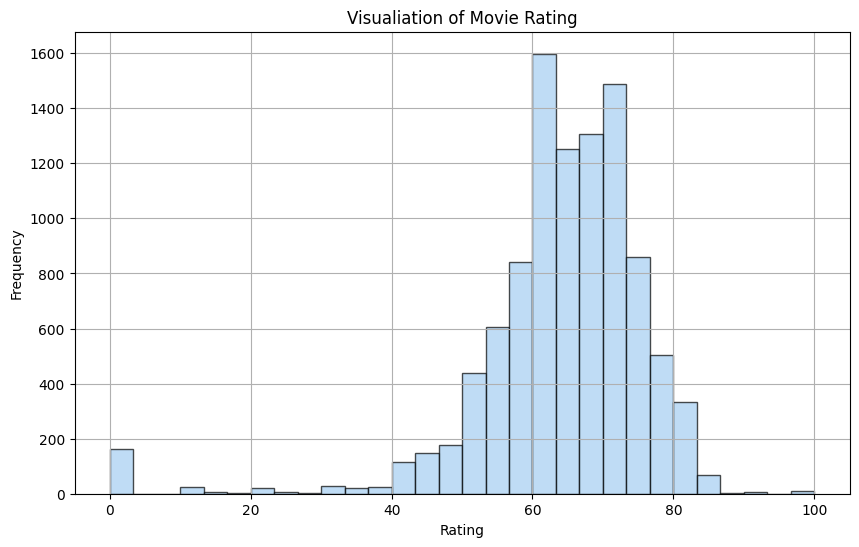

In [364]:
# Generate a histogram to visualize the distribution of movie ratings in the DataFrame 'df'.
# The title of the plot is "Visualization of Movie Rating".
# The x-axis label is "Rating" and the y-axis label is "Frequency".

generate_histogram(df['Rating'], "Visualiation of Movie Rating", "Rating", "Frequency")


**Observations:**

The histogram generated for movie ratings reveals a left-skewed distribution, indicating that most movies tend to have higher ratings. Upon closer examination, it's evident that most ratings fall within the range of 60 to 70, with a remarkable peak observed in this interval. Specifically, the frequencies within this range exceed 4000, suggesting that many movies receive ratings in this range. Conversely, lower ratings, particularly in the range of 0 to 40, are less common, with frequencies below 500 for each score. This observation suggests that audiences perceive movies positively, as evidenced by the clustering of ratings towards the higher end of the scale. Further analysis could explore factors contributing to this skewed distribution and investigate whether specific genres, release statuses, or other variables correlate with higher or lower ratings.


#### **Visualization and Observations on Budget**

---



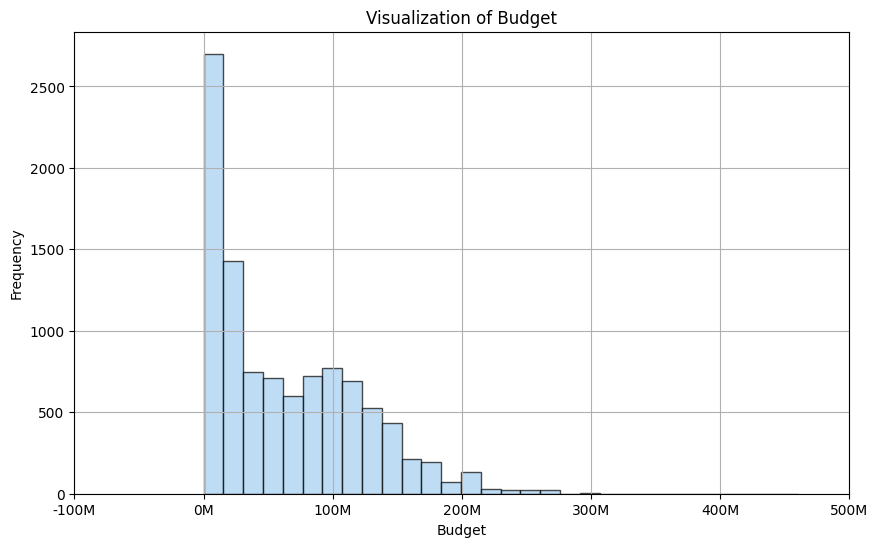

In [365]:
# Generate a histogram to visualize the distribution of movie budgets in the DataFrame 'df'.
# The title of the plot is "Visualization of Budget".
# The x-axis label is "Budget" and the y-axis label is "Frequency".
# The number of bins in the histogram is set to 20.

generate_histogram_remove_sci_notation(df['Budget'], "Visualization of Budget", "Budget", "Frequency", 20)

**Observations:**

The histogram generated for movie budgets illustrates a right-skewed distribution, indicating that a majority of the movies tend to have lower budgets. Specifically, the bin representing budgets of 15 million and below stands out with nearly 3500 films, making it the bin with the highest frequency. However, despite no other bin reaching such a high film count, it's notable that the majority of films fall within the range of budgets over 15 million. This observation suggests that while there is a significant number of low-budget films, the film industry tends to allocate higher budgets to a considerable proportion of movies. Further analysis could explore whether budget levels correlate with other factors such as genre, production status, or revenue.

#### **Visualization and Observations on Revenue**

---



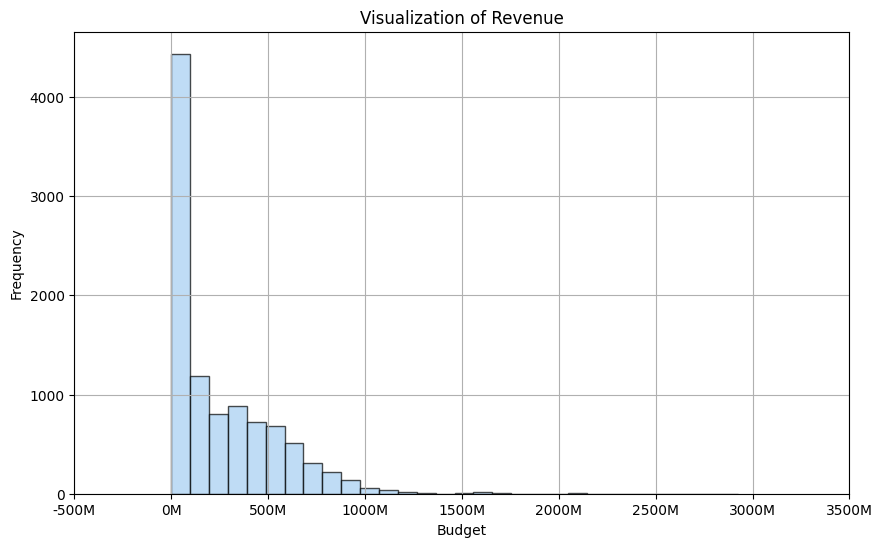

In [366]:
# Generate a histogram to visualize the distribution of movie budgets in the DataFrame 'df'.
# The title of the plot is "Visualization of Revenue".
# The x-axis label is "Revenue" and the y-axis label is "Frequency".
# The number of bins in the histogram is set to 20.

generate_histogram_remove_sci_notation(df['Revenue'], "Visualization of Revenue", "Budget", "Frequency", 20)

**Observations:**

The histogram generated for movie revenues reveals a right-skewed distribution, indicating that a significant proportion of movies tend to have lower revenues. Similar to the budget distribution, there is a prominent bin representing revenues under 100 million, which contains over 4500 films, making it the bin with the highest frequency. However, compared to the budget distribution, the revenue distribution exhibits an even larger number of films within this bin, indicating that a substantial portion of movies generates relatively low revenue.

Furthermore, the right tail of the revenue distribution extends significantly, with some movies generating revenues exceeding 2 billion. However, it's important to note that these extremely high revenue values are outliers, as they are rare occurrences in the dataset.

Overall, the revenue distribution follows a similar pattern to the budget distribution, with a right-skewed shape and a concentration of films at the lower end of the revenue spectrum. Further analysis could investigate the relationship between budget and revenue to understand how different budget levels correlate with revenue generation.

### **Categorical Analysis**

#### **Visualization and Observations on Genre**

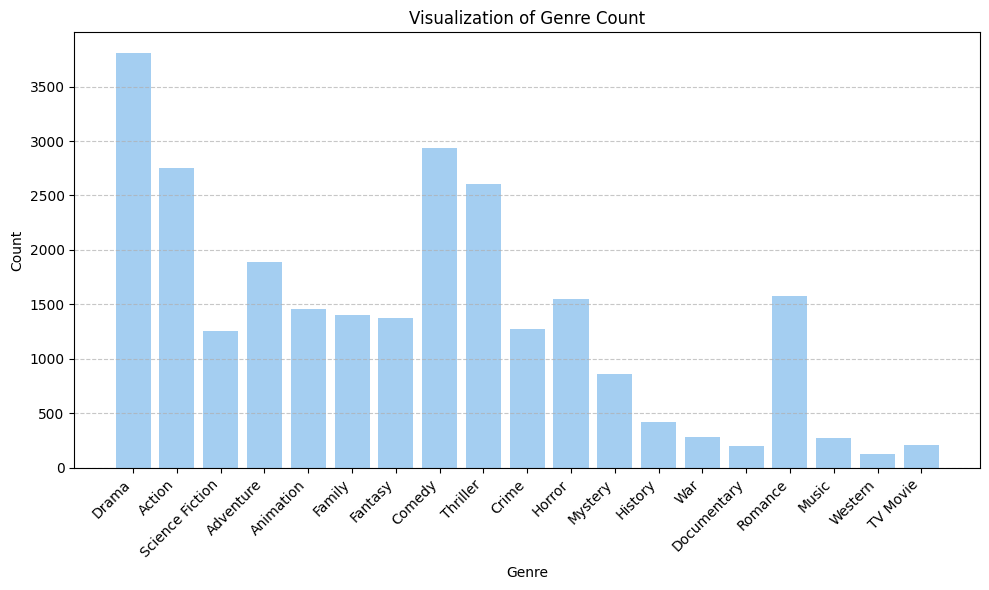

In [367]:
def extract_genres(genre_string):
    """
    Extract genres from a string containing one or more genres separated by commas.

    Parameters:
        genre_string (str): String containing one or more genres separated by commas.

    Returns:
        list: List of individual genres extracted from the input string.
    """
    if isinstance(genre_string, str):
        return [genre.strip() for genre in genre_string.split(',')]
    else:
        return []



class TallyAndUnique:
    def __init__(self):
        self.frequency_counter = Counter()
        self.unique_values = set()

    def update(self, lst):
        """
        Update the tally and unique values with a new list.

        Parameters:
            lst (list): Input list.
        """
        self.frequency_counter.update(lst)
        self.unique_values.update(lst)

    def get_results(self):
        """
        Compile the results into two lists: one for genre names and the other for their respective counts.

        Returns:
            tuple: A tuple containing two lists:
                - The first list contains genre names.
                - The second list contains counts corresponding to each genre.
        """
        genre_names = []
        counts = []
        for genre, count in self.frequency_counter.items():
            genre_names.append(genre)
            counts.append(count)
        return genre_names, counts



# Initialize an object to track unique genres and their frequencies
tally_unique_obj = TallyAndUnique()

# Initialize an empty list to store extracted genres
extracted_genres = []

# Loop through each genre string in the 'Genre' column
for genres in df['Genre']:
  # Extract individual genres from the string\
  genre_str = extract_genres(genres)

  # Update the tally object with the extracted genres
  tally_unique_obj.update(genre_str)

# Retrieve the frequency and unique genre lists
frequency_list, unique_list = tally_unique_obj.get_results()

# Generate a bar plot to visualize the genre frequencies
generate_bar_plot(frequency_list, unique_list, "Visualization of Genre Count", "Genre", "Count")

**Observations:**

**Genre Frequency Distribution:**
The bar plot reveals that the genre with the highest tally is "Drama," indicating that drama movies are the most prevalent genre in the dataset. Following "Drama," the next most frequent genre is "Comedy," suggesting a significant presence of comedic films. Conversely, the least represented genre is "Western," indicating a lower frequency of western movies within the dataset.

**Genre Diversity:**
The bar plot showcases the diversity of genres present in the dataset, with multiple genres being represented to varying extents. While "Drama" and "Comedy" dominate the dataset, the presence of other genres such as "Thriller," "Action," and "Romance" indicates a diverse range of movie types.

Overall, this observation provides valuable insights into the genre distribution of the dataset, highlighting the prominence of certain genres while also acknowledging the diversity of genres represented. Further exploration could delve into how genre distribution correlates with other factors such as release year, budget, and revenue.

#### **Visualization and Observations on Original Language**

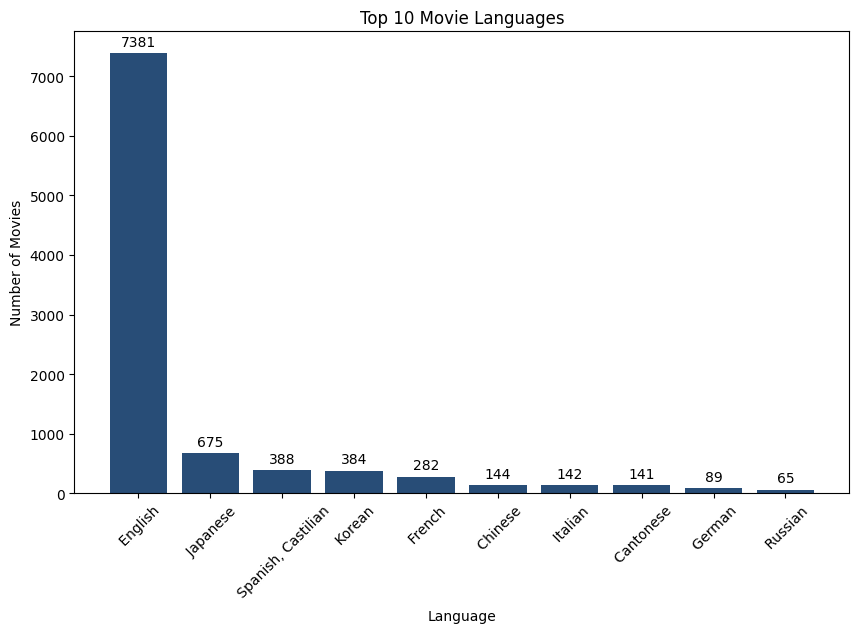

In [368]:
# Count the occurrences of each language in the 'Original Language' column
language_counts = df['Original Language'].value_counts().head(10)

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart using the language counts
bars = ax.bar(language_counts.index, language_counts.values, color='#284d77')

# Adding text labels above bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set the title and axis labels
plt.title('Top 10 Movie Languages')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Display plot
plt.show()


**Observations:**

The bar plot visualizes the distribution of movie languages within the dataset, showcasing the top 10 languages by count.

**Language Frequency Distribution:**
The bar with the highest count represents movies in the English language, with a total of 7381 occurrences. This dominance of English language movies is expected, given the widespread global influence of English-speaking cultures in the film industry. Following English, the next most represented language is Japanese, with 675 movies, indicating a notable presence of Japanese-language films within the dataset. Conversely, the lowest represented language among the top 10 is Russian, with only 65 occurrences.

**Language Diversity:**
The visualization highlights the diversity of languages present in the dataset, with multiple languages being represented to varying extents. While English clearly dominates the dataset, the presence of languages such as Japanese, French, Spanish, and others showcases the global nature of the film industry.

Overall, this observation provides valuable insights into the distribution of movie languages within the dataset, indicating the prominence of English-language films while also acknowledging the diversity of languages represented. Further exploration could delve into how language distribution correlates with other factors such as genre, release year, budget, and revenue.

#### **Visualization and Observations on Release Status**

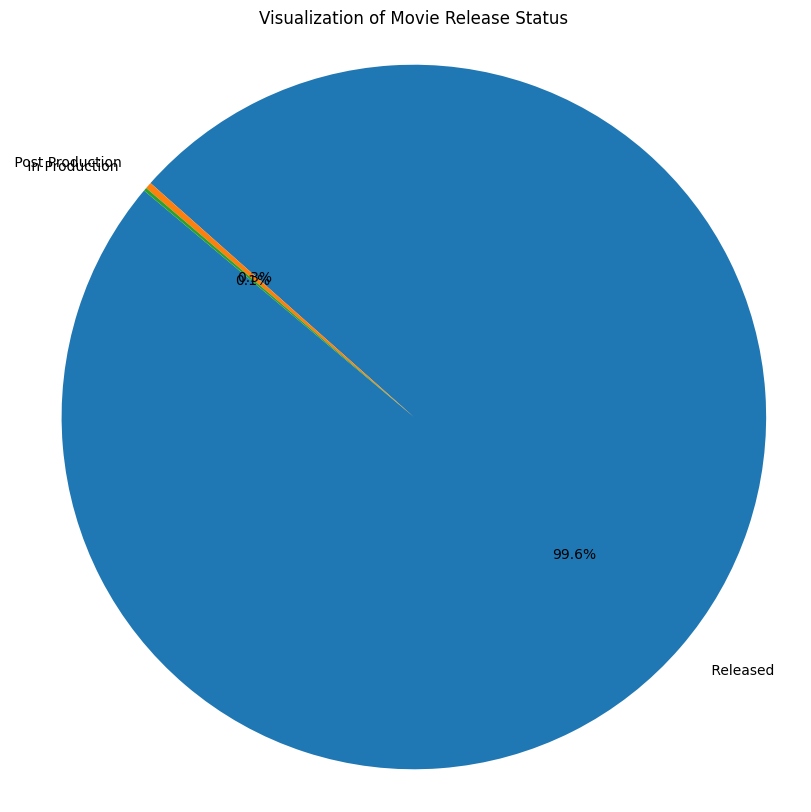

In [369]:
# Initialize an object to track unique release statuses and their frequencies
tally_unique_status_obj = TallyAndUnique()

# Loop through each status in the 'Status' column
for status in df['Status']:

  # Update the tally object with the current status
  tally_unique_status_obj.update([status])

# Retrieve the frequency and unique status lists
status_frequency_list, status_unique_list = tally_unique_status_obj.get_results()

# Generate a pie chart to visualize the release status frequencies
generate_pie_chart(status_frequency_list, status_unique_list, "Visualization of Movie Release Status")

**Observations:**

The pie chart illustrates the distribution of movie release statuses within the dataset, showcasing the frequency of each status category.

**Release Status Distribution:**
The pie chart reveals that the overwhelming majority of movies in the dataset are in the "Released" status category, accounting for approximately 99% of all films. This dominance of the "Released" status is expected, as it indicates that the vast majority of movies in the dataset have been released to the public for viewing.

**Limited Representation of Other Statuses:**
While the "Released" status overwhelmingly dominates the dataset, there may be limited representation of other release statuses such as "In Production," "Post Production." These statuses likely represent movies at various stages of production, with a smaller number of films compared to those already released.

Overall, this observation underscores the prominence of the "Released" status within the dataset, indicating that the majority of movies have already been made available to audiences. Further analysis could explore the distribution of other release statuses and their correlation with factors such as genre, budget, revenue, and critical reception.

#### **Visualization and Observations Movie Release by Country**

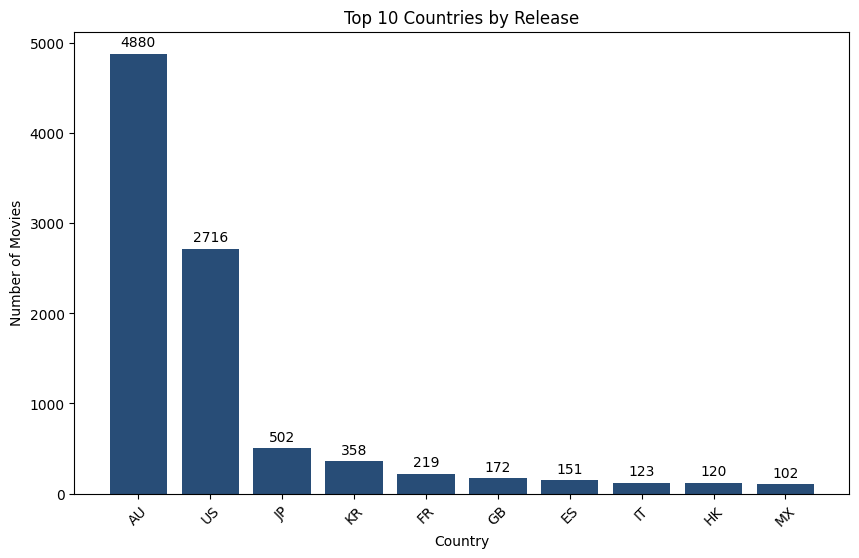

In [370]:
# Count the occurrences of each country in the 'Country' column
country_counts = df['Country'].value_counts().head(10)

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart using the country counts
bars = ax.bar(country_counts.index, country_counts.values, color='#284d77')

# Add text labels above each bar to display the count values
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set the title and axis labels
plt.title('Top 10 Countries by Release')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

**Observations:**
The bar plot visualizes the distribution of movie releases across different countries within the dataset, showcasing the top 10 countries by the number of movies released.

**Country Release Distribution:**
The bar representing Australia (AUS) has the highest count, indicating that it is the country with the most movie releases in the dataset, with a total of 4880 movies. This suggests a significant presence of Australian-released films within the dataset. Following Australia, the United States (US) is the next most represented country, with 2716 movies. Given the size and prominence of the Hollywood film industry, the high count of US movie releases is expected. On the other hand, Mexico (MX) has the lowest count among the top 10 countries, with only 102 movies released.

**Global Representation:**
The visualization highlights the global nature of the film industry, with movies originating from various countries around the world. While Australia and the United States dominate the top spots, the presence of other countries such as the Great Britain, India, France, and Japan among the top 10 indicates a diverse representation of national cinemas within the dataset.

Overall, this observation provides valuable insights into the distribution of movie releases across different countries, highlighting the prominence of certain countries while also acknowledging the global diversity of the film industry. Further analysis could explore the relationship between country of production and other factors such as genre, budget, revenue, and critical reception.

#### **Visualization and Observations on Crew Members**

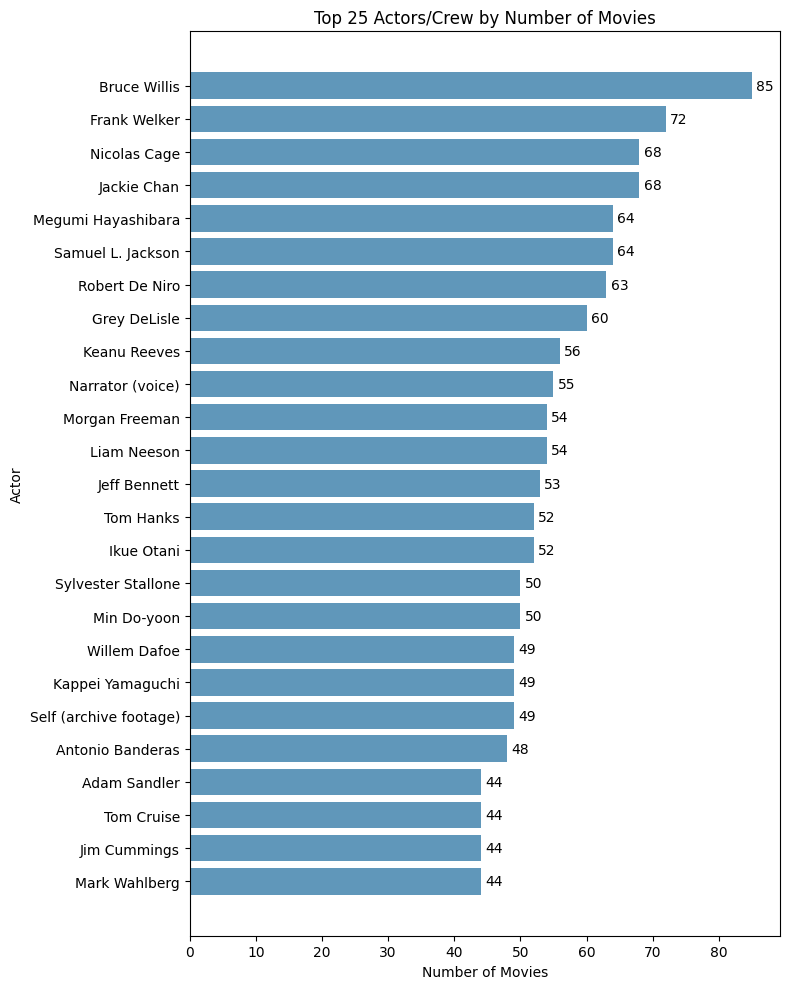

In [371]:
from collections import Counter

# Function to clean and filter actor names
def clean_and_filter_names(names):
    exclude_list = ['self', 'Self (archive footage)', 'Himself', 'Herself', 'voice', 'Narrator (voice)']
    return [name.strip() for name in names if name.strip() and ' ' in name.strip() and name not in exclude_list]

# Parse the 'Actor' column to extract names, clean, and filter
actor_list = df['Actor'].dropna().apply(lambda x: clean_and_filter_names(x.split(','))).sum()

# Count occurrences of each actor
actor_counts = Counter(actor_list)  # Count occurrences of each actor

# Identify the top 50 actors
top_25_actors = dict(actor_counts.most_common(25))

# Visualization with data labels for a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 10))  # Adjust figure size for horizontal orientation

# Reverse the order for plotting with barh to have the highest value at the top
actors, counts = zip(*sorted(top_25_actors.items(), key=lambda item: item[1], reverse=True))
bars = ax.barh(actors, counts, color='#6097BA')
ax.set_title('Top 25 Actors/Crew by Number of Movies')
ax.set_ylabel('Actor')
ax.set_xlabel('Number of Movies')

# Adding data labels to each bar, with adjustments for clarity
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset for the annotation
                textcoords="offset points",
                ha='left', va='center')
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value at the top
plt.show()


**Observations:**

The horizontal bar chart visualizes the distribution of actors/crew members based on the number of movies they have appeared in or contributed to within the dataset. Here are the observations:

**Top Actors/Crew by Number of Movies:**

Bruce Willis emerges as the actor/crew member with the highest number of movie appearances or contributions, with a total of 85 movies. Willis's prolific career and versatility across various genres likely contribute to his top position.

Frank Welker, known primarily as a voice actor, follows closely with 72 movies. Welker's extensive work in providing voices for animated characters in movies and television shows contributes significantly to his high count.

Mark Wahlberg rounds up the top 25 list with 44 movies. Wahlberg's diverse filmography, spanning from action-packed blockbusters to dramatic roles, has established him as a prominent figure in the industry.

**Diversity of Actors/Crew Represented:**

The top 25 actors/crew members encompass a diverse range of talents, including actors from different generations, genres, and areas of specialization. This diversity underscores the breadth and depth of talent within the film industry.

Overall, this observation provides insights into the contributions of various actors and crew members to the movies within the dataset, highlighting the most prolific individuals based on their movie counts. Further analysis could explore the types of roles these individuals typically undertake, their involvement in successful movies, and their impact on audience engagement and critical reception.







## **Exploratory Data Analysis: Multivariate**

#### **Visualization and Observations on Original Language vs Revenue**

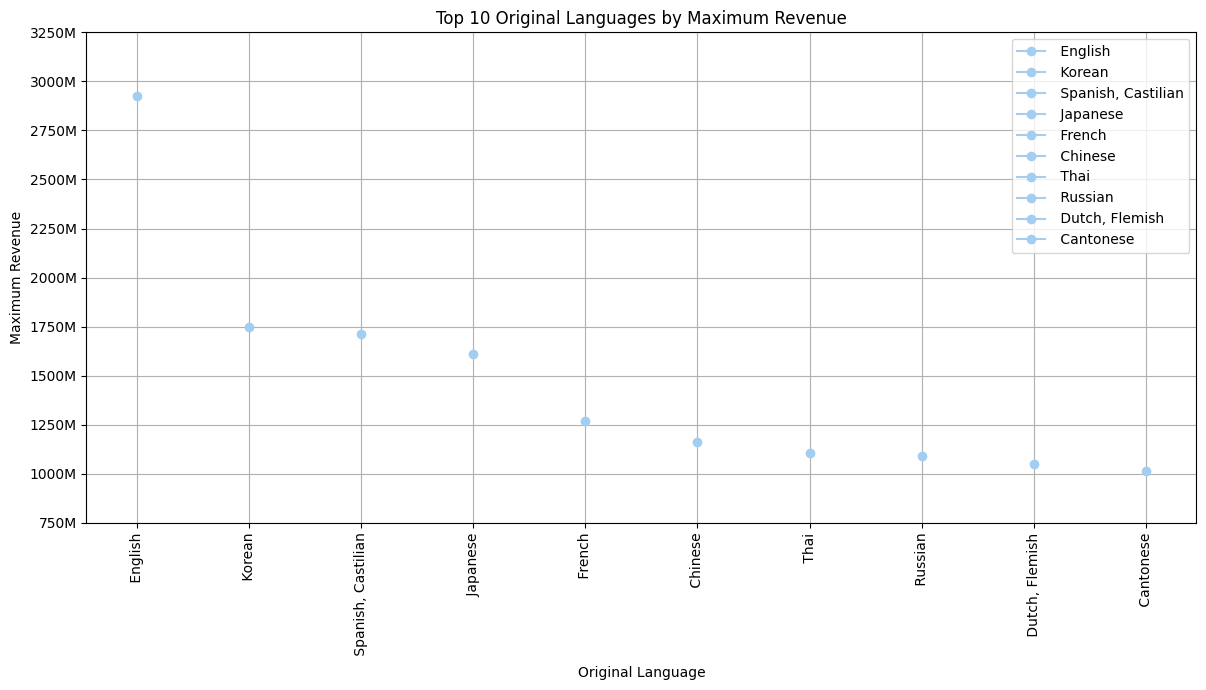

In [413]:
# Group the data by original language and calculate the maximum revenue for each language
language_max_revenue = df.groupby('Original Language')['Revenue'].max()

# Select the top 10 languages by maximum revenue
top_10_languages = language_max_revenue.nlargest(10)

# Filter the dataframe to include only the top 10 languages
df_top_10_languages = df[df['Original Language'].isin(top_10_languages.index)]

# Plot the line graph for the top 10 languages
plt.figure(figsize=(12, 7))
for lang in top_10_languages.index:
    lang_data = df_top_10_languages[df_top_10_languages['Original Language'] == lang]
    max_revenue_point = lang_data.loc[lang_data['Revenue'].idxmax()]  # Get the row with the maximum revenue
    plt.plot(max_revenue_point['Original Language'], max_revenue_point['Revenue'], marker='o', color='#A4CEF1', label=lang)

plt.title('Top 10 Original Languages by Maximum Revenue')
plt.xlabel('Original Language')
plt.xticks(rotation=90)  # Rotate language names for better visibility
plt.ylabel('Maximum Revenue')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Format y-axis tick labels
plt.yticks(ticks=plt.yticks()[0], labels=["{:.0f}M".format(y / 1e6) for y in plt.yticks()[0]])

plt.show()


**Observations:**

The line graph illustrates the maximum revenue generated by movies in the top 10 original languages represented in the dataset. Here are the observations:

**Highest Revenue Languages:**

English emerges as the language with the highest maximum revenue, generating approximately 3 billion dollars. Given the large quanity of releases from Austrailia and the United States and English-language cinema in the global film market, it's expected to see English leading in revenue.

Korean follows with around 1.75 billion dollars in maximum revenue. The Korean film industry, often referred to as "Hallyuwood," has gained international recognition in recent years, contributing to its significant revenue.

Japanese secures the fourth position with approximately 1.6 billion dollars in maximum revenue. Despite being the country with the second-highest number of movie releases, Japan's revenue ranks lower, suggesting a potential variance in box office success compared to volume.

Cantonese rounds up the top 10 languages with slightly over 1 billion dollars in maximum revenue. Cantonese cinema, particularly from Hong Kong, has historically been influential in Asian cinema and maintains a solid presence in the global market.


**Language Revenue Distribution:**

The line graph highlights the varying revenue levels across different original languages, indicating the diversity of the global film industry. While English dominates the top spot, other languages such as Korean, Japanese, and Cantonese also demonstrate significant revenue potential, reflecting the global appeal of films in diverse languages.

Overall, this observation provides insights into the revenue distribution among different original languages in the dataset, showcasing the revenue potential of films across various linguistic backgrounds. Further analysis could explore the factors contributing to the success of movies in different languages, including cultural influences, market dynamics, and audience preferences.

#### **Visualization and Observations on Budget vs Revenue**

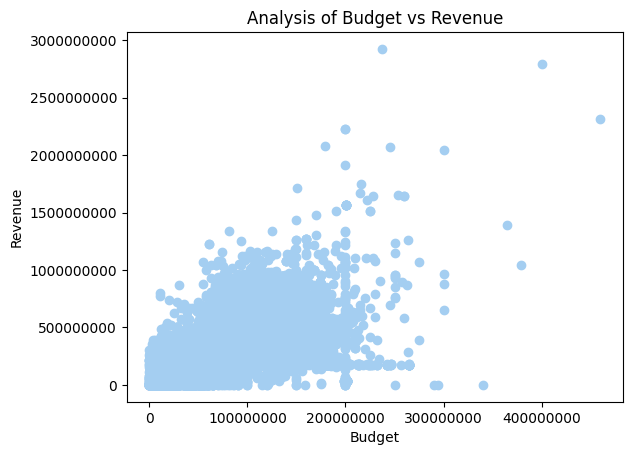

In [373]:
# Generate a scatter plot to analyze the relationship between budget and revenue
generate_scatter_plot(df['Budget'], df['Revenue'], "Analysis of Budget vs Revenue", "Budget", "Revenue")

**Observations:**
The scatter plot depicts the relationship between movie budgets and their corresponding revenues. Here are the observations:

**Concentration in Lower Left Quadrant:**

The majority of movies are clustered in the lower left quadrant of the plot. This concentration suggests that a significant portion of films in the dataset has relatively low budgets and correspondingly low revenues. These movies may include independent or low-budget productions that have limited financial resources but still contribute to the overall diversity of the film industry.

**Outliers in Top Right Quadrant:**

A few outliers are observed in the top right quadrant of the plot. These outliers represent movies with both high budgets and high revenues. Such movies are likely big-budget productions from major studios or highly successful blockbuster films that have achieved significant commercial success at the box office. Examples may include franchise films, high-profile sequels, or major studio releases with extensive marketing campaigns.

**Outliers in Bottom Right Quadrant:**

A larger number of outliers are situated in the bottom right quadrant. These outliers indicate movies with relatively low budgets but unexpectedly high revenues. These instances represent notable success stories where films have surpassed revenue expectations despite limited financial investment. Such outliers may include sleeper hits, independent films with strong critical acclaim, or niche genre movies that resonated well with audiences.

**Outliers in Middle of the Plot:**

Interestingly, most outliers are found in the middle of the plot, away from the quadrants' extremes. These outliers represent movies with moderate budgets and revenues that exceed expectations. These films demonstrate a balanced performance, achieving respectable financial returns without requiring exorbitant budgets. Such movies may include mid-budget productions with compelling storytelling, effective marketing strategies, or strong word-of-mouth recommendations.

Overall, the scatter plot provides insights into the diverse landscape of the film industry, showcasing the distribution of movies based on their budget and revenue levels. It highlights the presence of various success scenarios, ranging from low-budget indie gems to high-budget blockbuster hits,
contributing to the richness and dynamism of the cinematic landscape. Further analysis could explore the factors influencing the success of movies across different budget-revenue profiles, including genre preferences, audience demographics, and critical reception.

#### **Visualization and Observations on Ratings vs Revenue**

The correlation between ratings and revenue is 0.09


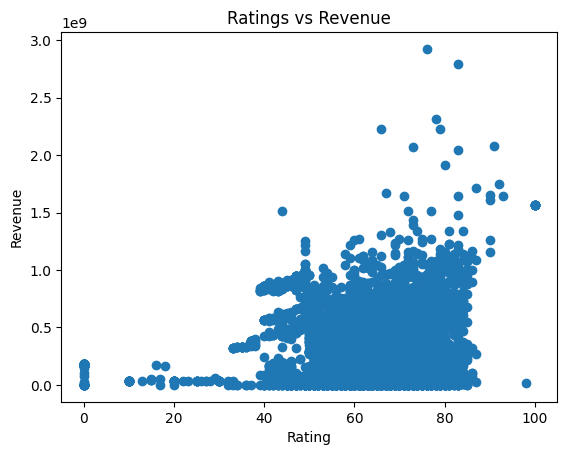

In [374]:
rating = df.iloc[:,2]
revenue = df.iloc[:,10]
correlation = st.pearsonr(rating,revenue)

plt.scatter(df.iloc[:,2],df.iloc[:,10])
plt.title('Ratings vs Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')

print(f"The correlation between ratings and revenue is {round(correlation[0],2)}")
plt.show()

**Observations:**

The scatter plot visualizes the relationship between movie ratings and their corresponding revenues. Here are the observations:

**Concentration in Lower Right Quadrant:**

The largest number of data points is clustered in the lower right quadrant of the plot. This concentration indicates a prevalent trend where movies with relatively higher ratings tend to generate lower revenues. It suggests that high critical acclaim or user ratings do not necessarily translate to significant financial success at the box office. These movies may include critically acclaimed indie films or niche productions that appeal to a specific audience but may not attract large mainstream audiences.

**Bulk of Plots between Rating 60-80:**

The majority of data points are concentrated in the middle range of ratings, particularly between 60 and 80. This concentration suggests that a significant portion of movies in the dataset falls within this rating range. These movies likely represent a mix of genres, styles, and production budgets, catering to a broad spectrum of audience preferences and tastes.

**Few Plots in Upper Right Quadrant:**

Only a handful of data points are observed in the upper right quadrant of the plot. These data points represent movies with both high ratings and high revenues, indicating exceptional cases where critical acclaim aligns with commercial success. These outliers may include highly acclaimed blockbuster hits, award-winning films, or cult classics that have garnered widespread acclaim and achieved significant box office success.

**Left-Skewed Tail with Scragglers:**

The plot exhibits a left-skewed tail with scattered data points in the lower left quadrant, corresponding to movies with low ratings and low revenues. These data points represent movies that have received poor critical reception and have struggled to attract audiences, resulting in minimal financial returns. Such movies may include poorly received flops, critically panned films, or low-budget productions that failed to resonate with viewers.

Overall, the scatter plot reveals insights into the relationship between movie ratings and revenues, highlighting the complex interplay between critical reception and commercial performance in the film industry. Further analysis could explore the factors influencing the disparity between ratings and revenues, including marketing strategies, audience demographics, and genre preferences.

#### **Visualization and Observations on Top 10 Primary Genres by Highest Average Revenue**

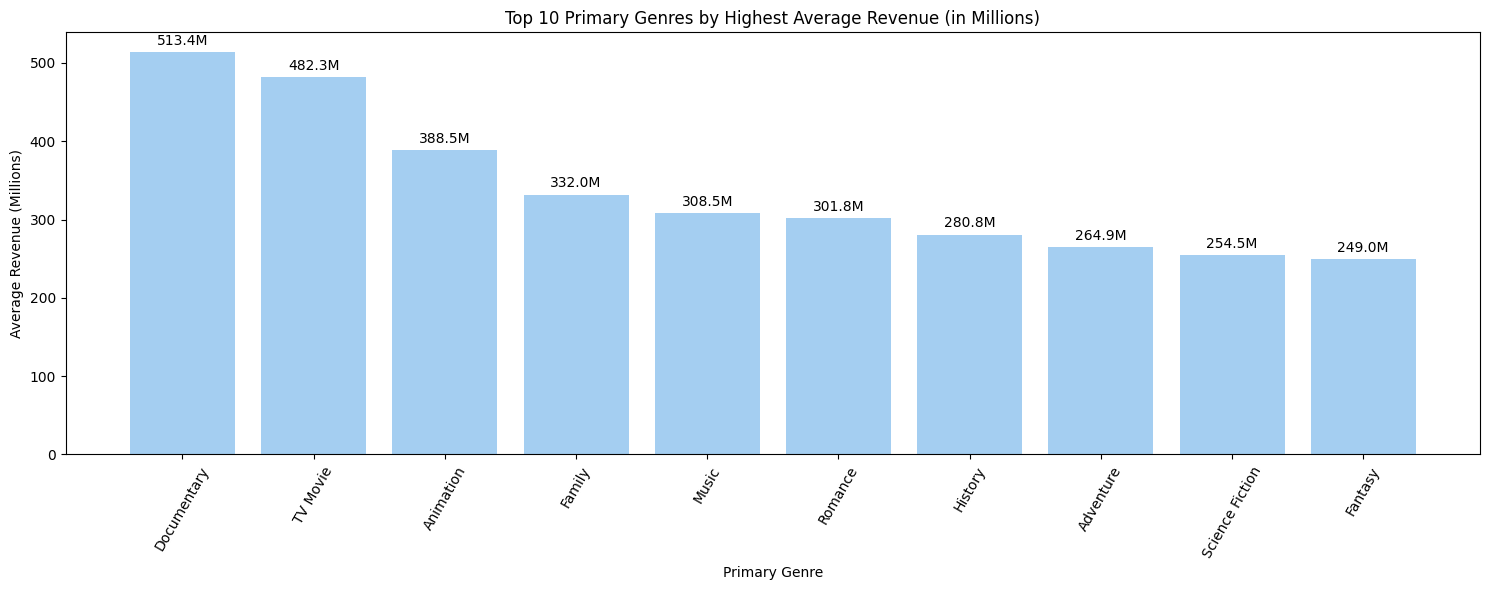

In [375]:
# Top 10 Primary Genres by Highest Average Revenue (in Millions)
# Create a new column 'Primary Genre' by selecting the first genre from the 'genre' column
df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)
# Calculate the average revenue by primary genre, converting revenue to millions
rating_by_genre = df.loc[:, ['Primary Genre', 'Revenue']]
rating_by_genre['Revenue'] = rating_by_genre['Revenue'] / 1e6  # Convert revenue to millions
rating_by_genre = rating_by_genre.groupby('Primary Genre').mean()
top_10_genres = rating_by_genre.nlargest(10, 'Revenue')
# Create a bar plot with formatting changes
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(top_10_genres.index, top_10_genres['Revenue'], color='#A4CEF1')
# Update the title and labels to accurately reflect the data being plotted
ax.set_title('Top 10 Primary Genres by Highest Average Revenue (in Millions)')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Average Revenue (Millions)')
# Ensure the x-tick labels are correctly set
ax.set_xticks(range(len(top_10_genres.index)))
ax.set_xticklabels(top_10_genres.index, rotation=60)
# Adding numerical labels to each bar to display revenue in millions with 1 decimal point
for bar in bars:
    height = bar.get_height()
    label = f'{height:.1f}M'  # Add 'M' to denote millions
    ax.annotate(label,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

**Observations:**
* ...

#### **Visualization and Observations on Primary Genre vs Rating**

<ipython-input-376-3136526bae70>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_genres.index, rotation=60)


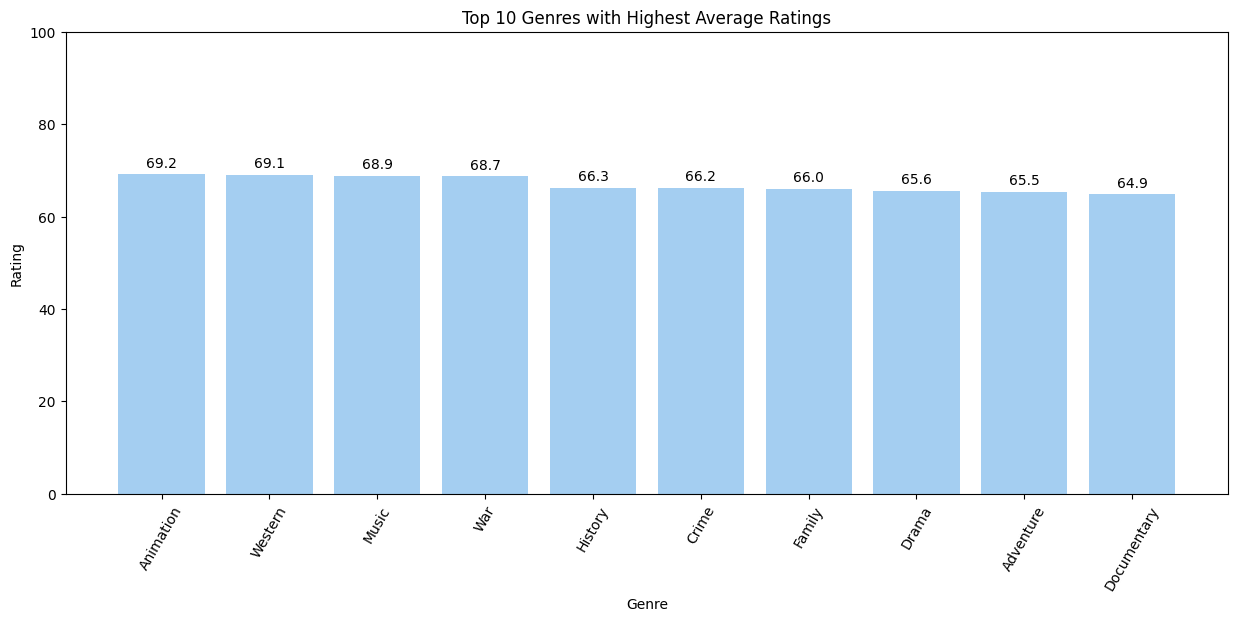

In [376]:
# Create a new column 'Primary Genre' by selecting the first genre from the 'genre' column
df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)

# Calculate the average rating by primary genre
rating_by_genre = df.loc[:, ['Primary Genre', 'Rating']]
rating_by_genre = rating_by_genre.groupby('Primary Genre').mean()
top_10_genres = rating_by_genre.nlargest(10, 'Rating')

# Create a bar plot with formatting changes
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(top_10_genres.index, top_10_genres['Rating'], color='#A4CEF1')
ax.set_title('Top 10 Genres with Highest Average Ratings')
ax.set_xlabel('Genre')
ax.set_ylabel('Rating')
ax.set_xticklabels(top_10_genres.index, rotation=60)
ax.set_ylim(0, 100)  # Adjust the y-axis range

# Adding numerical labels to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


**Observations:**
* ...

#### **Visualization and Observations on Ratings by Country**

<ipython-input-377-ea9369f04b45>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_countries_avg.index, rotation=60)


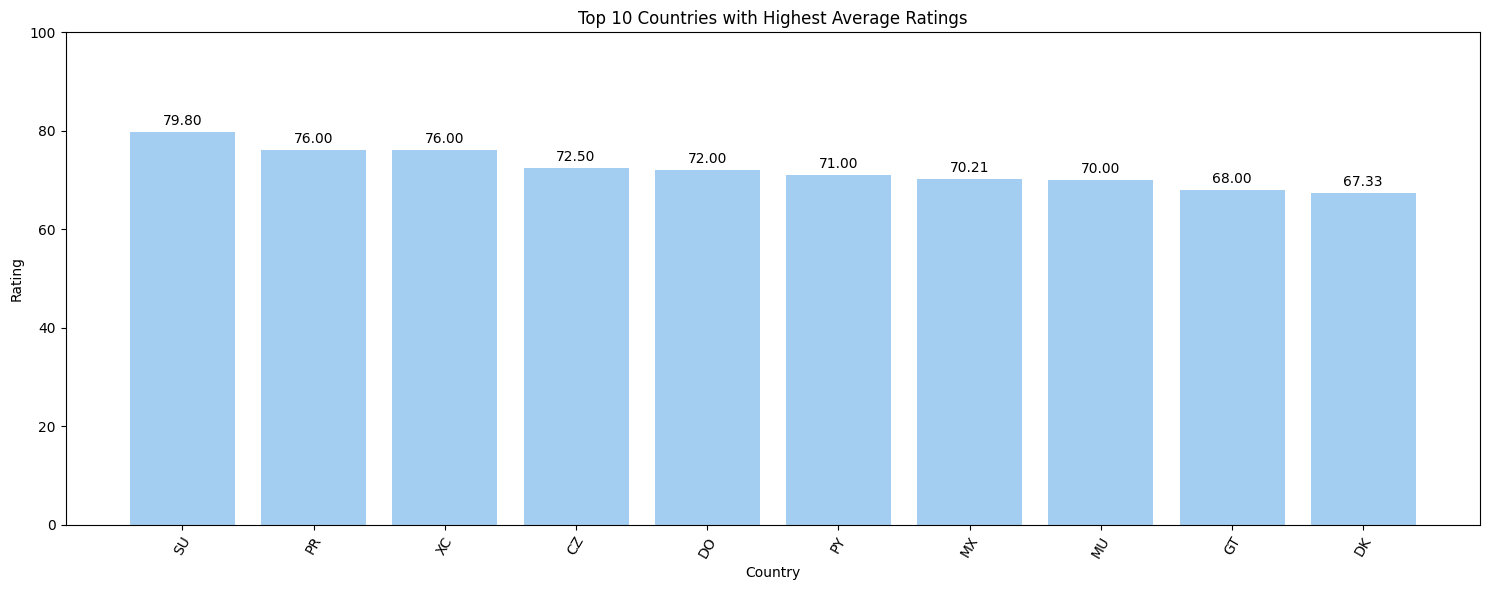

In [377]:
# Get the list of top 10 countries by average rating
top_10_countries_avg = df.groupby('Country')['Rating'].mean().nlargest(10)


# Create a bar plot with adjusted y-axis and numerical labels
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(top_10_countries_avg.index, top_10_countries_avg.values, color='#A4CEF1')
ax.set_title('Top 10 Countries with Highest Average Ratings')
ax.set_xlabel('Country')
ax.set_ylabel('Rating')
ax.set_xticklabels(top_10_countries_avg.index, rotation=60)
ax.set_ylim(0, 100)  # Set the y-axis range from 0 to 100

# Adding numerical labels to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Observations:**
* ...

#### **Visualization and Observations on Ratings vs Budget**

The correlation between ratings and budget is -0.21


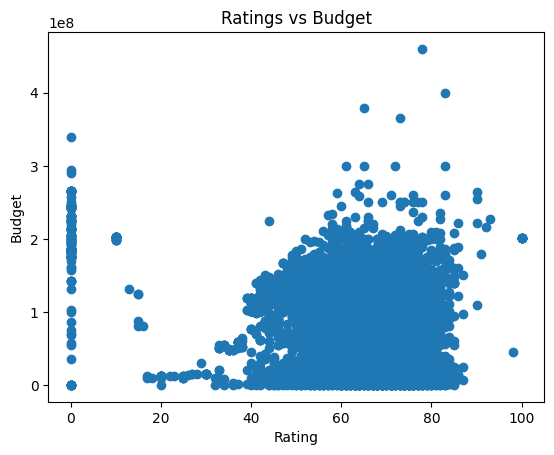

1        460000000
230      400000000
298      379000000
329      365000000
117      340000000
           ...    
9631             7
4600             6
4919             5
10087            1
2805             1
Name: Budget, Length: 10052, dtype: int64


In [378]:
# Ratings : Budget  df.iloc[:,9]
rating = df.iloc[:,2]
budget = df.iloc[:,9]
correlation = st.pearsonr(rating,budget)

plt.scatter(df.iloc[:,2],df.iloc[:,9])
plt.title('Ratings vs Budget')
plt.xlabel('Rating')
plt.ylabel('Budget')

print(f"The correlation between ratings and budget is {round(correlation[0],2)}")
plt.show()

# Questions to team:
# 1. How do we want to handle movies with 0 budget?
# 2. How do I convert the budget so that it displays in millions?

print(budget.sort_values(ascending=False))


**Observations:**
* ...

#### **Visualization and Observations on Ratings vs Genre**

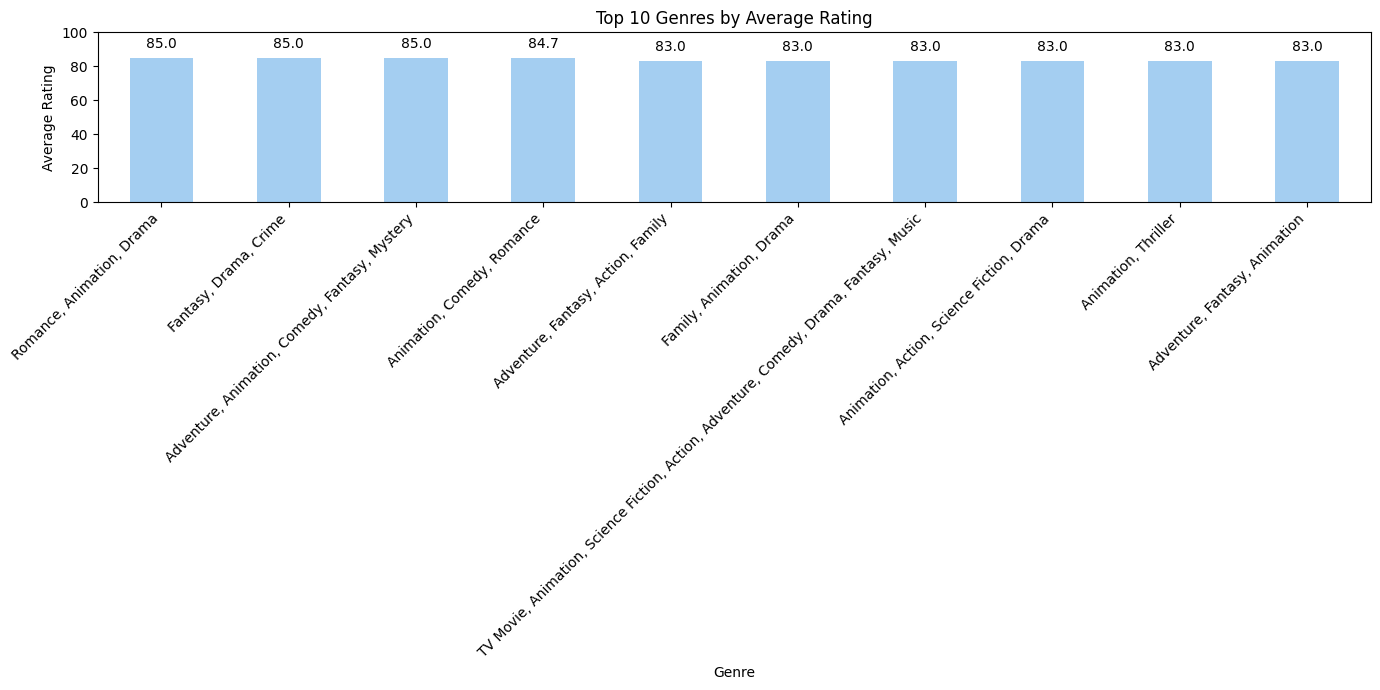

In [379]:
genre_scores = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Select the top 10 genres
top_genres_plot = genre_scores.head(10)

# Visualization
fig, ax = plt.subplots(figsize=(14, 7))
top_genres_plot.plot(kind='bar', color='#A4CEF1', ax=ax)
ax.set_title('Top 10 Genres by Average Rating')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_xticklabels(top_genres_plot.index, rotation=45, ha="right")
ax.set_ylim(0, 100)  # Set y-axis to run from 0 to 100

# Adding numerical labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()


#### **Visualization and Observations Top 5 Genre by decade**

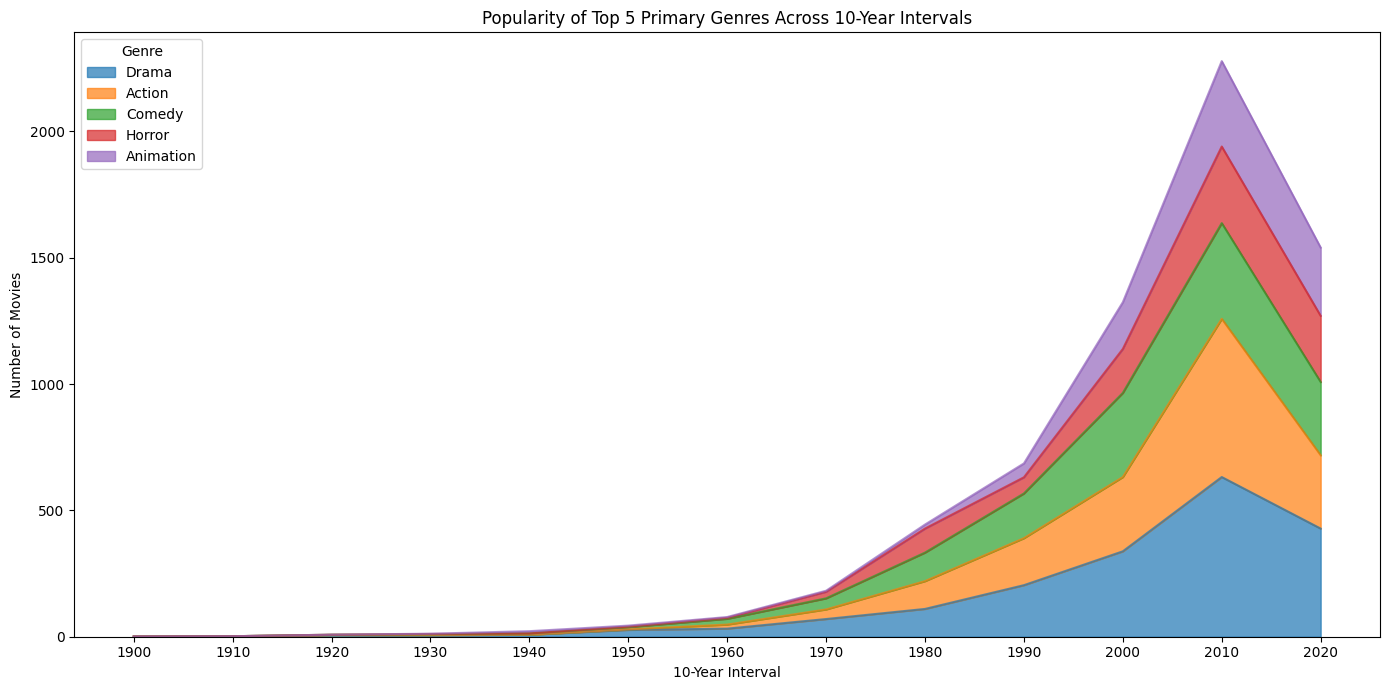

In [380]:
df['release_year'] = pd.to_datetime(df['Date']).dt.year

# Focus on the primary genre
df['primary_genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)

# 10 Year bins
def bin_years(year):
    return (year // 10) * 10

# Apply the binning function to create a new column for the 5-year intervals
df['year_bin'] = df['release_year'].apply(bin_years)

# Count Movies by Genre and 10-Year Interval
genre_year_counts = df.groupby(['year_bin', 'primary_genre']).size().unstack(fill_value=0)

# Focus on the top genres by overall count for clarity
top_genres = df['primary_genre'].value_counts().nlargest(5).index

# Filter the data to include only the top genres
filtered_genre_counts = genre_year_counts[top_genres]
filtered_genre_counts.plot(kind='area',
                           stacked=True,
                           figsize=(14, 7),
                           alpha=0.7)  # Adjust transparency with alpha
plt.title('Popularity of Top 5 Primary Genres Across 10-Year Intervals')
plt.xlabel('10-Year Interval')
plt.ylabel('Number of Movies')
plt.xticks(np.arange(min(df['year_bin']), max(df['year_bin'])+1, 10))  # Adjust x-ticks for 10-year intervals
plt.legend(title='Genre', loc='upper left')
plt.tight_layout()

plt.show()

#### **Visualization and Observations: Total Revenue Generated by Top 25 Actors**

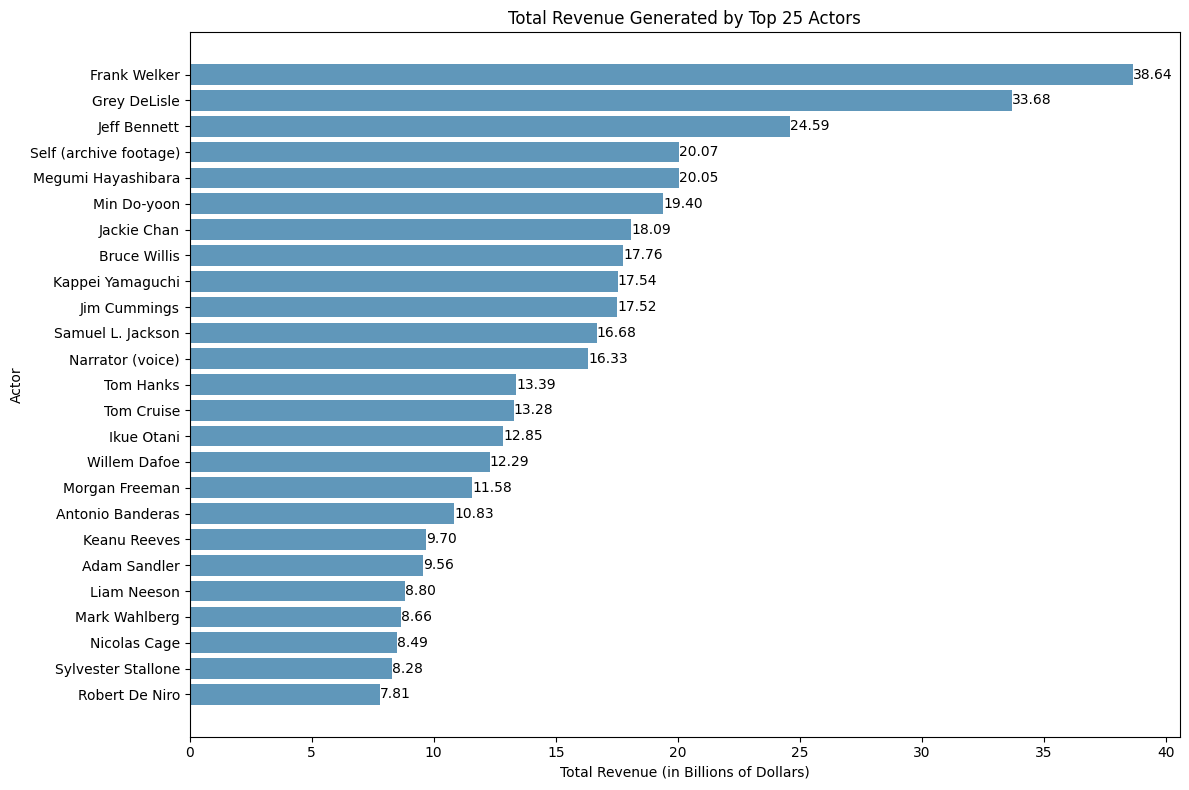

In [381]:
# Function to clean, filter actor names, and exclude specific entries
def clean_and_filter_names(names):
    exclude_list = ['self', 'Self (archive footage)', 'Himself', 'Herself', 'voice', 'Narrator (voice)']
    return [name.strip() for name in names if name.strip() and ' ' in name.strip() and name not in exclude_list]

# Apply the function and get a flat list of all actor names, excluding the specified names
actor_list = df['Actor'].dropna().apply(lambda x: clean_and_filter_names(x.split(','))).sum()

# Count occurrences of each actor
actor_counts = Counter(actor_list)

# Identify the top 25 actors by number of movies
top_25_actors = dict(actor_counts.most_common(25))

# Initialize a dictionary to hold total revenue for each of the top 25 actors
actor_revenue = defaultdict(float)

# Iterate through the DataFrame to accumulate revenue for each actor
for index, row in df.iterrows():
    if pd.notna(row['Actor']) and pd.notna(row['Revenue']):
        actors = clean_and_filter_names(row['Actor'].split(','))
        for actor in actors:
            if actor in top_25_actors:
                # Check if this actor is in the top 25 list
                actor_revenue[actor] += row['Revenue'] / 1e9

# Convert revenue to billions
# Convert to DataFrame for easier handling
actor_revenue_df = pd.DataFrame(list(actor_revenue.items()), columns=['Actor', 'Total Revenue'])

# Sort the DataFrame by 'Total Revenue' to get the top 25 actors by revenue
actor_revenue_df = actor_revenue_df.sort_values(by='Total Revenue', ascending=False)

# Visualization with revenue displayed on bars
plt.figure(figsize=(12, 8))
bars = plt.barh(actor_revenue_df['Actor'], actor_revenue_df['Total Revenue'], color='#6097BA')
plt.xlabel('Total Revenue (in Billions of Dollars)')
plt.ylabel('Actor')
plt.title('Total Revenue Generated by Top 25 Actors')
plt.gca().invert_yaxis()

# Annotate bars with revenue
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


## **Conclusion and Recommendations**

-----------------------------------------------------------------
### **Conclusion**
-----------------------------------------------------------------

The team analyzed a dataset of nearly ...
The data spanned ...
The main feature of interest here is the ...
From a business perspective, ...
Thus, the team determined the factors that affect ...

The team have been able to conclude that:

1. ...

--------------------------------------------------
### **Recommendation to business**
--------------------------------------------------

1. ...

---------------------------------
###  **Further Analysis**
---------------------------------
1. Dig deeper to explore the variation of ...